In [1]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *

In [2]:
# show the best params for all the files in the /results folder
for file in os.listdir('./results'):
    if file.endswith('.csv'):
        print('='*20+file+'='*20)
        prep_p, mod_p = get_best_params('./results/'+file)
        print('Preprocessing best params:')
        print(prep_p)
        print('Model best params:')
        print(mod_p)

====================results_catboost.csv====================
Preprocessing best params:
{'scaling': None, 'imputation': 'mode', 'cat_age': False, 'merge_capital': False, 'downsampling_method': 'random', 'target_freq': 0.85, 'generate_dummies': False, 'remove_duplicates': True}
Model best params:
{'iterations': 750, 'depth': 6, 'border_count': 32, 'random_seed': 42, 'verbose': 0, 'loss_function': 'Logloss', 'eval_metric': 'F1', 'class_weights': [1, 1], 'cat_features': ['class_worker', 'det_ind_code', 'det_occ_code', 'education', 'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason', 'full_or_part_emp', 'tax_filer_stat', 'region_prev_res', 'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'mig_same', 'fam_under_18', 'country_father', 'country_mother', 'country_self', 'citizenship', 'own_or_self', 'vet_question', 'vet_benefits', 'year']}
====================results_knn.csv====================
Preprocessing best par

{'catboost': 0.7976616217772858,
 'knn': 0.7580555798828874,
 'lda': 0.7578632912005435,
 'logreg': 0.7749505241526554,
 'qda': 0.7401926203343498,
 'rf': 0.7806861921434933,
 'svm': 0.7732645069011365}


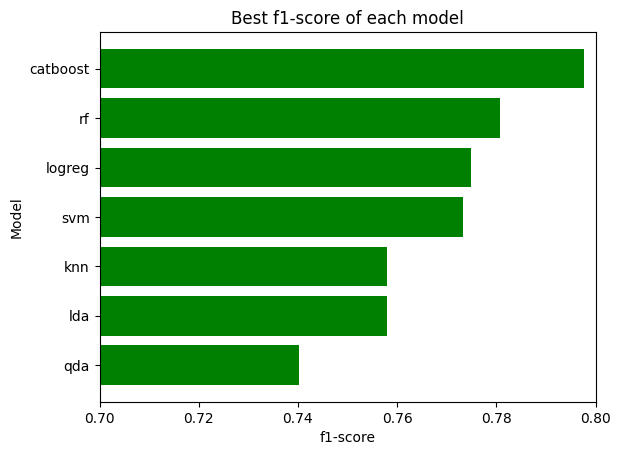

In [9]:
best_f1 = {}
for file in os.listdir('./results'):
    if file.endswith('.csv'):
        res = read_results('./results/'+file)
        best_f1[file.split('_')[1][:-4]] = res['f1_macro'].max()
    
pprint(best_f1)
# barplot the best f1_macro of each model sorted by the best f1_macro
# sort the dict by value
best_f1 = {k: v for k, v in sorted(best_f1.items(), key=lambda item: item[1])}
plt.barh(list(best_f1.keys()), list(best_f1.values()), color='green')
plt.xlim(0.7, 0.8)
plt.xlabel('f1-score')
plt.ylabel('Model')
plt.title('Best f1-score of each model')
plt.show()

In [4]:
prep_p, mod_p = get_best_params('./results/results_catboost.csv')
mod_p['cat_features'] = ''
pprint(prep_p)
pprint(mod_p)

{'cat_age': False,
 'downsampling_method': 'random',
 'generate_dummies': False,
 'imputation': 'mode',
 'merge_capital': False,
 'remove_duplicates': True,
 'scaling': None,
 'target_freq': 0.85}
{'border_count': 32,
 'cat_features': '',
 'class_weights': [1, 1],
 'depth': 6,
 'eval_metric': 'F1',
 'iterations': 750,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': 0}


In [5]:
df = pd.read_csv('./results/results_catboost.csv')
for obj_col in ['prep_param', 'model_param']:
    df[obj_col] = df[obj_col].apply(lambda x: ast.literal_eval(x))
df.sort_values(by=['f1_macro'], inplace=True, ascending=False)
df.drop_duplicates(subset=['f1_macro'], inplace=True)
df_exp = expand_dicts(df)
df_exp.head()

,accuracy,f1_macro,precision_macro,recall_macro,tex,scaling,imputation,cat_age,merge_capital,downsampling_method,...,remove_duplicates,iterations,depth,border_count,random_seed,verbose,loss_function,eval_metric,class_weights,cat_features
0,0.952802,0.797662,0.801389,0.794142,275.496793,None,mode,False,False,random,...,True,750,6,32,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
1,0.953138,0.796922,0.804067,0.790271,181.339746,None,mode,False,False,random,...,True,750,4,96,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
2,0.953224,0.796888,0.804704,0.789666,181.043571,None,mode,False,False,random,...,True,750,4,96,42,0,Logloss,AUC,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
3,0.952888,0.795990,0.803046,0.789549,178.471049,None,mode,False,False,random,...,True,750,4,64,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
4,0.952730,0.795402,0.802126,0.789145,174.454477,None,mode,False,False,random,...,True,750,4,32,42,0,Logloss,AUC,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."


In [6]:
df = pd.read_csv('results_log_regression.csv')
df.sort_values(by=['f1_macro'], inplace=True, ascending=False)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'results_log_regression.csv'

In [ ]:
df = read_results('./results/results_rf.csv')
df = expand_dicts(df)
df['n_estimators'].unique()

array([ 75, 100,  50], dtype=int64)

In [ ]:
df = pd.read_csv('results_svm.csv')
df.sort_values(by=['f1_macro'], inplace=True, ascending=False)
df.head()

In [ ]:
df = pd.read_csv('results_catboost.csv')
df.sort_values(by=['f1_macro'], inplace=True, ascending=False)
df.head()